In [ ]:
pip install pandas odfpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 717.0/717.0 kB 7.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for odfpy: filename=odfpy-1.4.1-py2.py3-none-any.whl size=160673 sha256=f611e3a388a6e673fef249218ec1587fbd9b4fd839e608bd050772bdc5a62271
  Stored in directory: /root/.cache/pip/wheels/d6/1d/c8/8c29be1d73ca42d15977c75193d9f39a98499413c2838ac54c
Successfully built odfpy


<ipython-input-3-8ed6158add0f>:40: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  annot=cell_props_sorted.T.applymap(lambda x: f"{x:.0%}" if x > 0.05 else ""),
<ipython-input-3-8ed6158add0f>:71: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


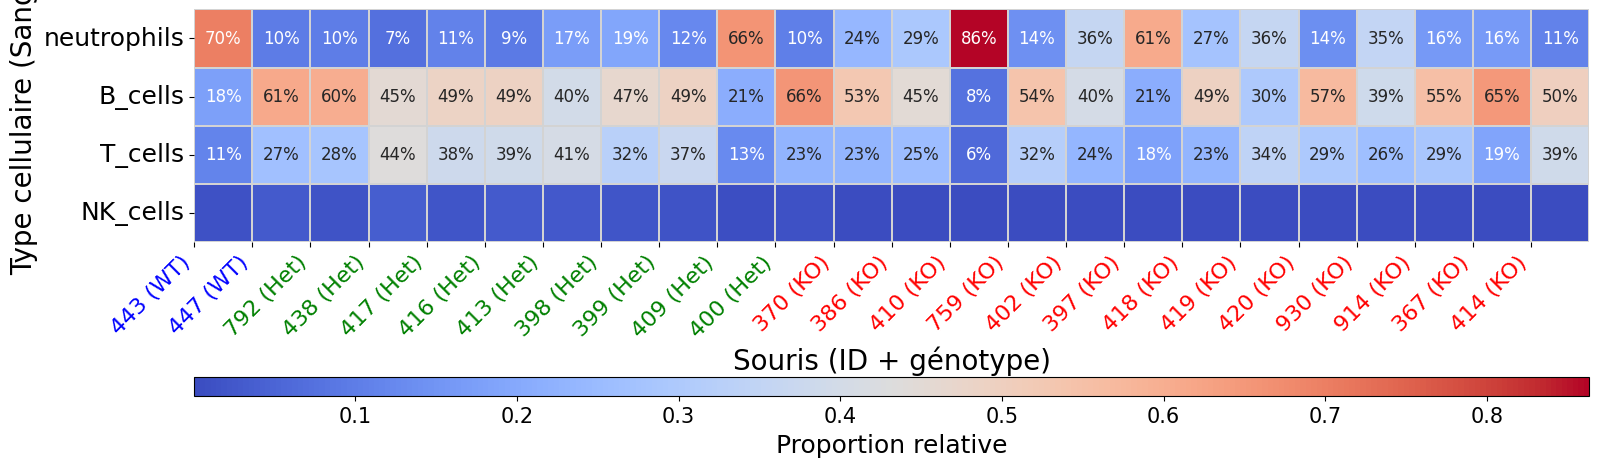

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

# Chargement des données
data = pd.read_excel("heatmap_Sang.ods", engine="odf")

# Liste des types cellulaires analysés
cell_types = ['neutrophils', 'B_cells', 'T_cells', 'NK_cells']

# Calcul des proportions relatives
cell_counts = data[cell_types]
cell_props = cell_counts.div(cell_counts.sum(axis=1), axis=0)

# Création des labels combinés pour les souris
data['mouse_label'] = data['mouse_id'].astype(str) + " (" + data['genotype'] + ")"
cell_props.index = data['mouse_label']

# Ajout et tri par génotype
cell_props['genotype'] = pd.Categorical(data['genotype'], categories=['WT', 'Het', 'KO'], ordered=True)
cell_props_sorted = cell_props.sort_values('genotype')

# Séparer labels et données numériques
mouse_labels_sorted = cell_props_sorted.index
cell_props_sorted = cell_props_sorted.drop(columns='genotype')

# Initialisation de la figure avec GridSpec
fig = plt.figure(figsize=(18, 6))
gs = gridspec.GridSpec(nrows=2, ncols=1, height_ratios=[20, 1], hspace=0.3)

# Création de la heatmap
ax = fig.add_subplot(gs[0])
heatmap = sns.heatmap(
    cell_props_sorted.T,
    cmap="coolwarm",
    linewidths=0.3,
    linecolor='lightgray',
    cbar=False,  # Désactive la colorbar ici
    annot=cell_props_sorted.T.applymap(lambda x: f"{x:.0%}" if x > 0.05 else ""),
    fmt="",
    annot_kws={"fontsize": 12},
    square=True,
    ax=ax
)

# Ajout manuel de la colorbar en dessous
cax = fig.add_subplot(gs[1])
norm = plt.Normalize(vmin=cell_props_sorted.min().min(), vmax=cell_props_sorted.max().max())
sm = plt.cm.ScalarMappable(cmap="coolwarm", norm=norm)
cbar = fig.colorbar(sm, cax=cax, orientation='horizontal')
cbar.set_label("Proportion relative", size=18, labelpad=5)
cbar.ax.tick_params(labelsize=15)

# Esthétique
ax.set_xlabel("Souris (ID + génotype)", fontsize=20)
ax.set_ylabel("Type cellulaire (Sang)", fontsize=20)

# Ticks
ax.set_xticks(range(len(mouse_labels_sorted)))
ax.set_xticklabels(mouse_labels_sorted, rotation=45, ha='right', fontsize=16)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=18)

# Coloration des ticks selon génotype
genotypes_sorted = data.set_index('mouse_label').loc[mouse_labels_sorted, 'genotype']
color_dict = {'WT': 'blue', 'Het': 'green', 'KO': 'red'}

for tick_label, genotype in zip(ax.get_xticklabels(), genotypes_sorted):
    tick_label.set_color(color_dict.get(genotype, 'black'))

plt.tight_layout()
plt.savefig("heatmap_cellules_Sang_genotype_VF.png", dpi=600)
plt.show()
